In [1]:
import sys
sys.path.append( '../relative_fitness_mechanisms/' )
import plot_utils
import relative_fitness_gp

In [2]:
import jax
from jax import jit, lax
from functools import partial
import jax.numpy as jnp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import evofr as ef

In [3]:
raw_seq = pd.read_csv("../../evofr/test/testing_data/mlr-variant-counts.tsv", sep="\t")
raw_seq = raw_seq[raw_seq.location == "City0"]

In [4]:
data = ef.VariantFrequencies(raw_seq, pivot="C")

In [5]:
from evofr.plotting import FrequencyPlot, GrowthAdvantagePlot, TimeVaryingPlot, PatchLegend

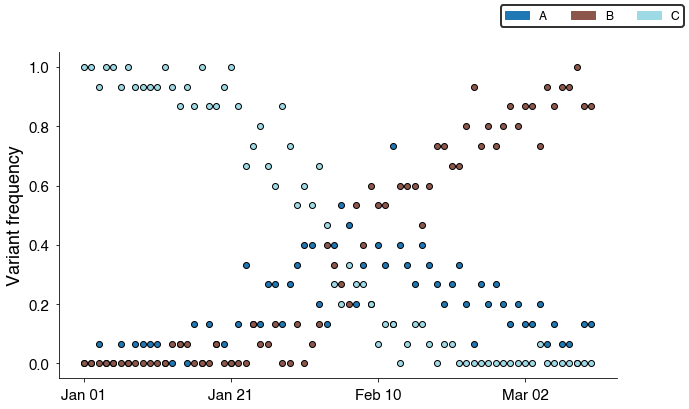

In [6]:
freq_plot = FrequencyPlot(data=data).plot(posterior=False);
PatchLegend(color_map=freq_plot.color_map).add_legend(ax=freq_plot.ax);

In [7]:
from relative_fitness_gp import SquaredExpCov, RelativeFitnessGP

In [8]:
kernel = SquaredExpCov()
model = RelativeFitnessGP(gp=kernel, tau=4.2, pseudocount=0.01)


In [9]:
result = model.fit_qd(data)

OptStep(params={'log_amp_expsq': DeviceArray(-2.6664605, dtype=float32), 'log_diag': DeviceArray(-2.540668, dtype=float32), 'log_scale_expsq': DeviceArray(3.6688476, dtype=float32)}, state=ScipyMinimizeInfo(fun_val=DeviceArray(4755.0723, dtype=float32, weak_type=True), success=False, status=2, iter_num=2))
Final negative log likelihood: 4755.072265625


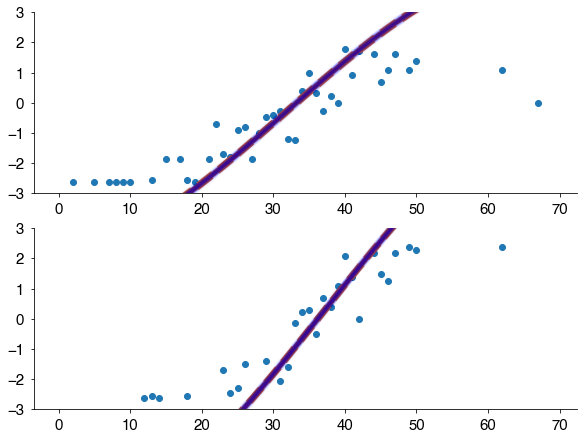

In [10]:
fig = plt.figure(figsize=(8., 6.), constrained_layout=True)
spec = fig.add_gridspec(ncols=1, nrows=2)

cond_gps, y, samples = result

for r, res in enumerate(cond_gps): 
    ax = fig.add_subplot(spec[r])
    
    cond_gp = res
    mu = cond_gp.mean
    std = np.sqrt(cond_gp.variance)
    ax.plot(mu, "C1", label="mean")
    ax.plot(mu + std, "--C1", label="1-sigma region")
    ax.plot(mu - std, "--C1")
    
    y_samp = cond_gp.sample(jax.random.PRNGKey(10), shape=(100,))
    ax.plot(y_samp.T, color="blue", alpha=0.01)

    ax.scatter(np.arange(y.shape[0]), y[:, r])
    ax.set_ylim((-3, 3))

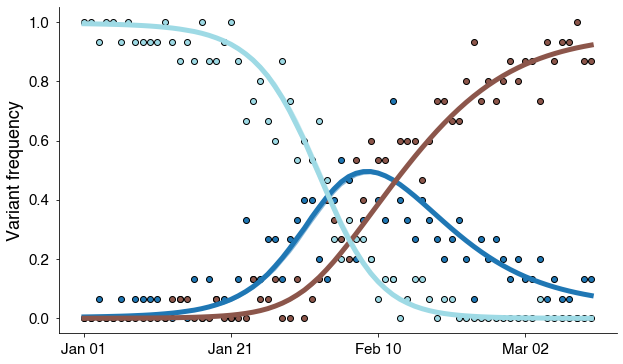

In [11]:
freq_plot = FrequencyPlot(data=data, samples = samples).plot()

Text(0, 0.5, 'Relative Fitness')

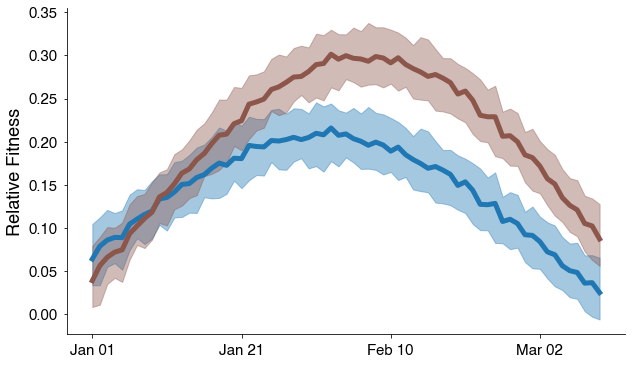

In [12]:
delta_plot = TimeVaryingPlot(data=data, samples = samples, site="delta").plot()
delta_plot.ax.set_ylabel("Relative Fitness")

In [ ]:
# Really we want measurement error to depend on N...